In [17]:
from chanlun import data,hebin0, hebin1,fenbi,fenbi1,tt1,zhongshu

def chan_zs(df):
    H,L=hebin0(df)
    H1=list(H)
    L1=list(L)
    H,L,jl=hebin1(H,L)
    T,W,Q,GG,DD=fenbi(H,L)
    T11,W11,Q11,xin,yin,GG11,DD11=fenbi1(H,L,T,W,Q,GG,DD)
    T0=tt1(jl,T11)
    if Q[-1]==-1:
        GG11.append(yin)
    else:
        DD11.append(yin) 
    ZS,JLZS=zhongshu(Q11,GG11,DD11)
#     print("中枢")
#     print(ZS)
#     print("记录中枢")
#     print(JLZS)

    c=tt1(jl,[xin])[0]#这里将最后一个也加上，从而画出图
    T0.append(c)
    W11.append(yin)

    W12=[]
    JLZS1=[]
    for i in JLZS:
        W12.append(W11[i])
        JLZS1.append(T0[i])


    return ZS,JLZS,JLZS1
 




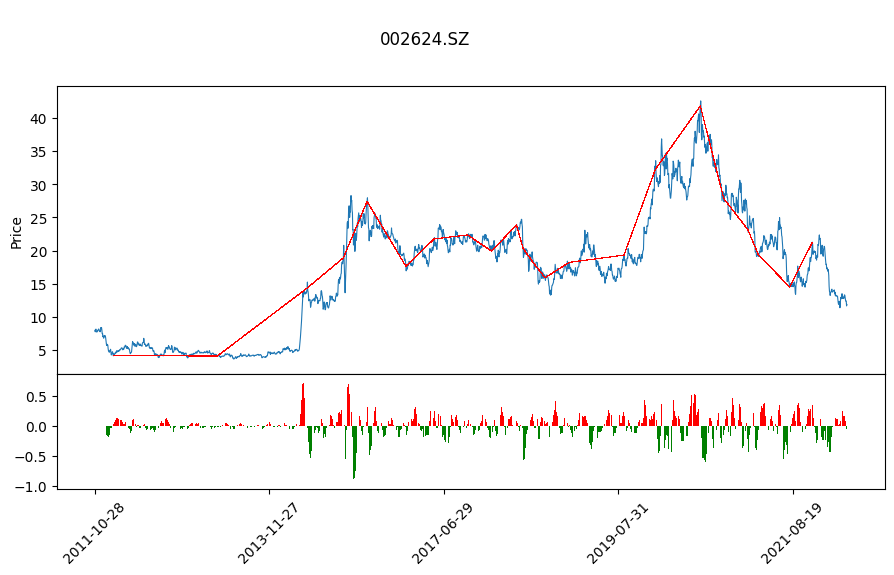

In [31]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf
ts_code='002624.sz'
data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
# data=data[data['trade_date']>'20190101']
data=data[data['trade_date']<'20220415']
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data=data.set_index('trade_date')   



data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['close'])
colors = ['r' if v >= 0 else 'g' for v in data["macd_hist"]]
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) 

 
        
mycolor = mpf.make_marketcolors(up='red',down='green',inherit=True)
mystyle = mpf.make_mpf_style(y_on_right=False,marketcolors=mycolor)


plots = [macd_hist_plot]


js,jlzs,jlzs1=chan_zs(data)

alines=[]
for i in jlzs1:
    alines.append((data.iloc[i].name,data.iloc[i]['close']))  
 
mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         title=f"\n002624.SZ", 
         volume=False, 
         addplot=plots,
         alines=dict(alines=alines,colors=['r'],linewidths=0.1),
        )